# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go

data = 'data/heart.csv'
df = pd.read_csv(data)
print(df.shape)
print(df.head())
col_names = df.columns
print(col_names)
df.info()




(918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
<

In [2]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)
df[categorical].head()

There are 5 categorical variables

The categorical variables are : ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [3]:
df[categorical].isnull().sum()

Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

In [4]:
for var in categorical: 
    
    print(df[var].value_counts())
    # print(df[var].value_counts()/np.float(len(df)))

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [5]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Sex  contains  2  labels
ChestPainType  contains  4  labels
RestingECG  contains  3  labels
ExerciseAngina  contains  2  labels
ST_Slope  contains  3  labels


In [6]:
pd.get_dummies(df.ChestPainType, drop_first=True,dtype=int).head()

,ATA,NAP,TA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,1,0


In [7]:
pd.get_dummies(df.RestingECG, drop_first=True,dtype=int).head()    #dummy_na=True

,Normal,ST
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
pd.get_dummies(df.RestingECG, drop_first=True,dtype=int).sum(axis=0)

Normal    552
ST        178
dtype: int64

In [9]:
pd.get_dummies(df.ExerciseAngina, drop_first=True,dtype=int).head()

,Y
0,0
1,0
2,0
3,1
4,0


In [10]:
pd.get_dummies(df.Sex, drop_first=True,dtype=int).head()

,M
0,1
1,0
2,1
3,0
4,1


In [11]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [12]:
df[numerical].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [13]:
print(round(df[numerical].describe()),2)

         Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
count  918.0      918.0        918.0      918.0  918.0    918.0         918.0
mean    54.0      132.0        199.0        0.0  137.0      1.0           1.0
std      9.0       19.0        109.0        0.0   25.0      1.0           0.0
min     28.0        0.0          0.0        0.0   60.0     -3.0           0.0
25%     47.0      120.0        173.0        0.0  120.0      0.0           0.0
50%     54.0      130.0        223.0        0.0  138.0      1.0           1.0
75%     60.0      140.0        267.0        0.0  156.0      2.0           1.0
max     77.0      200.0        603.0        1.0  202.0      6.0           1.0 2


Text(0, 0.5, 'MaxHR')

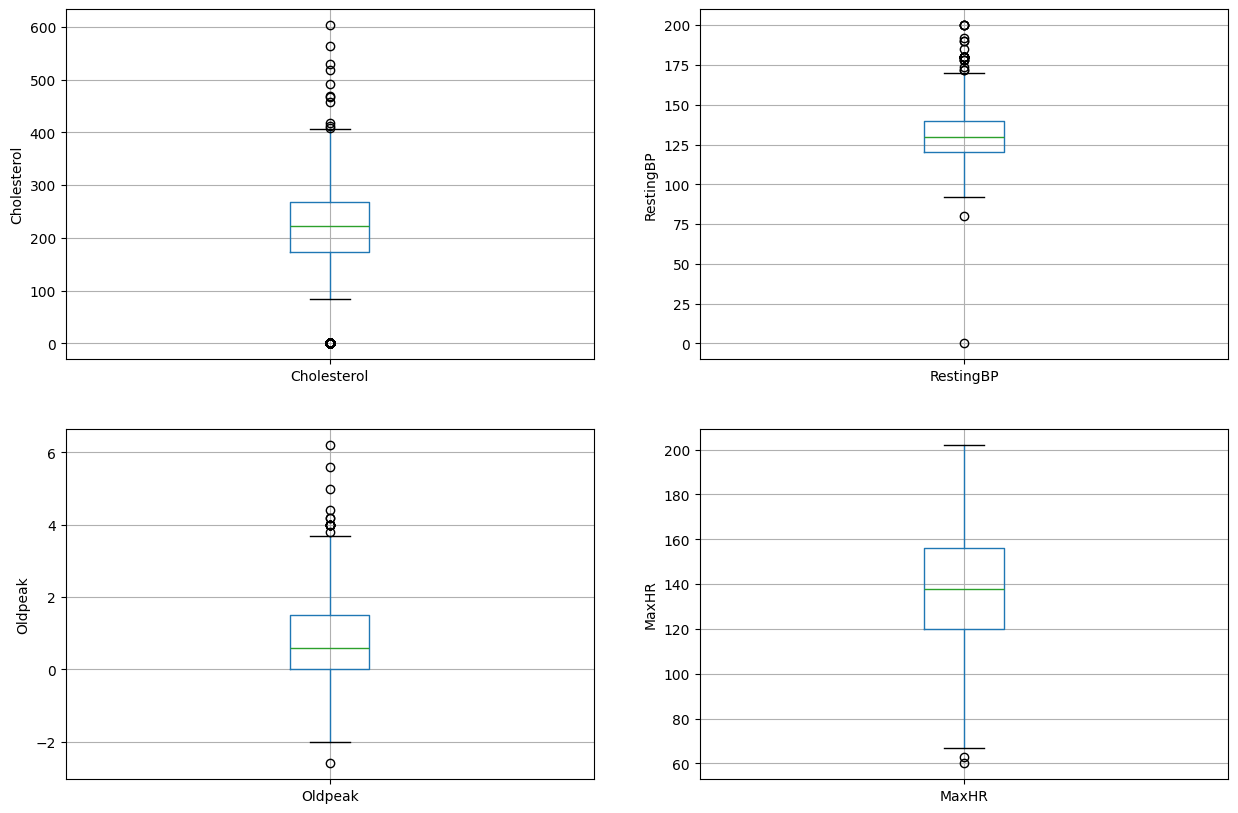

In [14]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Cholesterol')
fig.set_title('')
fig.set_ylabel('Cholesterol')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='RestingBP')
fig.set_title('')
fig.set_ylabel('RestingBP')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Oldpeak')
fig.set_title('')
fig.set_ylabel('Oldpeak')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='MaxHR')
fig.set_title('')
fig.set_ylabel('MaxHR')

Text(0, 0.5, 'HeartDisease')

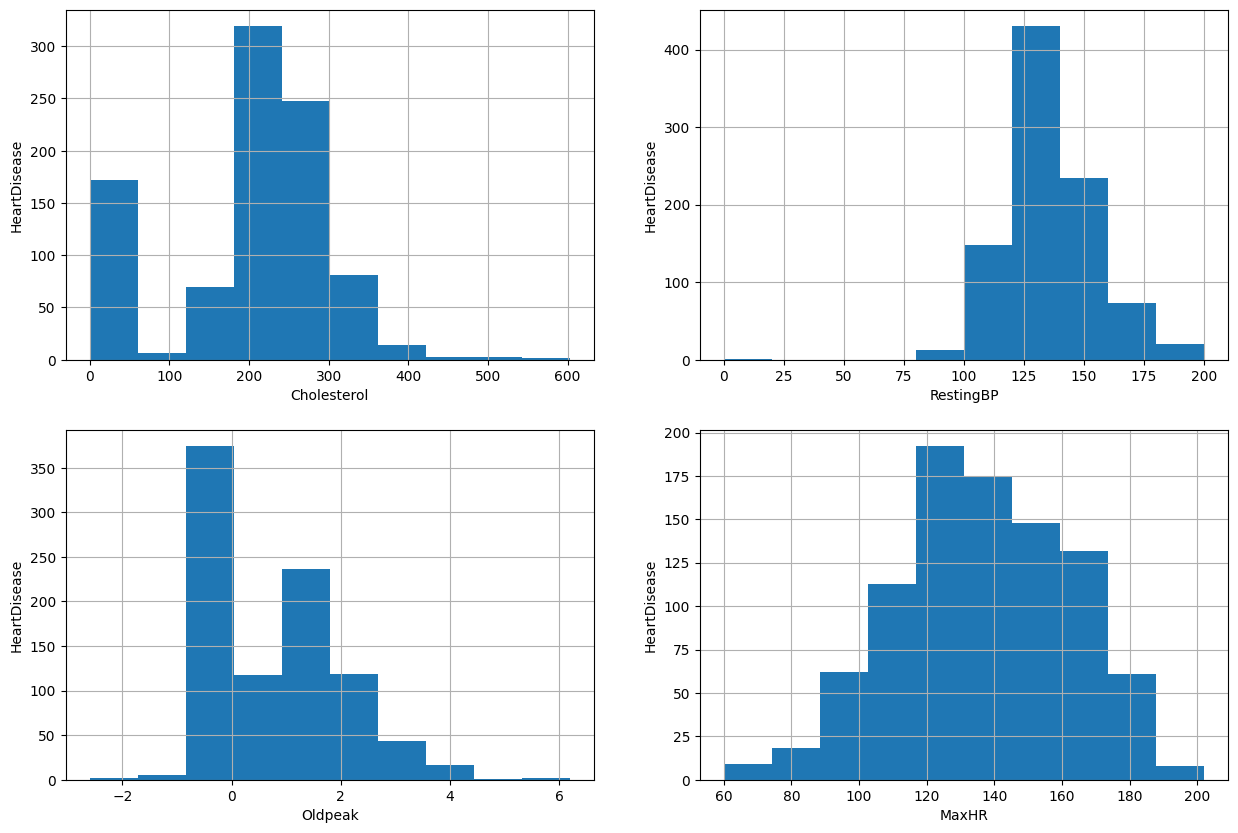

In [15]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Cholesterol.hist(bins=10)
fig.set_xlabel('Cholesterol')
fig.set_ylabel('HeartDisease')


plt.subplot(2, 2, 2)
fig = df.RestingBP.hist(bins=10)
fig.set_xlabel('RestingBP')
fig.set_ylabel('HeartDisease')


plt.subplot(2, 2, 3)
fig = df.Oldpeak.hist(bins=10)
fig.set_xlabel('Oldpeak')
fig.set_ylabel('HeartDisease')


plt.subplot(2, 2, 4)
fig = df.MaxHR.hist(bins=10)
fig.set_xlabel('MaxHR')
fig.set_ylabel('HeartDisease')

In [16]:
IQR = df.Cholesterol.quantile(0.75) - df.Cholesterol.quantile(0.25)
Lower_fence = df.Cholesterol.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Cholesterol.quantile(0.75) + (IQR * 1.5)
print('Cholesterol outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.RestingBP.quantile(0.75) - df.RestingBP.quantile(0.25)
Lower_fence = df.RestingBP.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.RestingBP.quantile(0.75) + (IQR * 1.5)
print('RestingBP outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.MaxHR.quantile(0.75) - df.MaxHR.quantile(0.25)
Lower_fence = df.MaxHR.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.MaxHR.quantile(0.75) + (IQR * 1.5)
print('MaxHR outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.Oldpeak.quantile(0.75) - df.Oldpeak.quantile(0.25)
Lower_fence = df.Oldpeak.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Oldpeak.quantile(0.75) + (IQR * 1.5)
print('Oldpeak outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Cholesterol outliers are values < 32.625 or > 407.625
RestingBP outliers are values < 90.0 or > 170.0
MaxHR outliers are values < 66.0 or > 210.0
Oldpeak outliers are values < -2.25 or > 3.75


In [17]:
X = df.drop(['HeartDisease'], axis=1)

y = df['HeartDisease']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
X_train.shape, X_test.shape

((642, 11), (276, 11))

In [20]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Cholesterol'] = max_value(df3, 'Cholesterol', 407.625)
    df3['RestingBP'] = max_value(df3, 'RestingBP', 170.0)
    df3['MaxHR'] = max_value(df3, 'MaxHR', 210.0)
    df3['Oldpeak'] = max_value(df3, 'Oldpeak', 3.75)  




In [21]:
X_train.Cholesterol.max(), X_test.Cholesterol.max()

(np.float64(407.625), np.float64(407.625))

In [22]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
X_train[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,53.590343,132.451713,199.648559,0.213396,137.258567,0.878972
std,9.454651,17.836272,104.203859,0.410024,25.424234,1.021414
min,28.000000,0.000000,0.000000,0.000000,63.000000,-2.600000
25%,47.000000,120.000000,177.000000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,266.000000,0.000000,157.750000,1.500000
max,77.000000,170.000000,407.625000,1.000000,202.000000,3.750000


In [23]:
X_train[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
76,M,ASY,Normal,N,Flat
48,M,NAP,Normal,N,Flat
304,M,ASY,Normal,N,Flat
263,M,ASY,Normal,N,Flat
744,M,ASY,Normal,Y,Up


In [24]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['ExerciseAngina'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [25]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina_0,ExerciseAngina_1,Oldpeak,ST_Slope
76,32,M,ASY,118.0,407.625,0,Normal,130.0,0,1,0.0,Flat
48,36,M,NAP,112.0,340.000,0,Normal,184.0,0,1,1.0,Flat
304,51,M,ASY,95.0,0.000,1,Normal,126.0,0,1,2.2,Flat
263,59,M,ASY,130.0,126.000,0,Normal,125.0,0,1,0.0,Flat
744,60,M,ASY,117.0,230.000,1,Normal,160.0,1,0,1.4,Up


In [26]:
X_train = pd.concat([X_train[numerical], X_train[['ExerciseAngina_0', 'ExerciseAngina_1']],
                     pd.get_dummies(X_train.Sex,dtype=int), 
                     pd.get_dummies(X_train.ChestPainType,dtype=int),
                     pd.get_dummies(X_train.RestingECG,dtype=int),
                     pd.get_dummies(X_train.ST_Slope,dtype=int)], axis=1)

In [27]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ExerciseAngina_0,ExerciseAngina_1,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
76,32,118.0,407.625,0,130.0,0.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0
48,36,112.0,340.000,0,184.0,1.0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
304,51,95.0,0.000,1,126.0,2.2,0,1,0,1,1,0,0,0,0,1,0,0,1,0
263,59,130.0,126.000,0,125.0,0.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0
744,60,117.0,230.000,1,160.0,1.4,1,0,0,1,1,0,0,0,0,1,0,0,0,1


In [28]:
X_test = pd.concat([X_test[numerical], X_test[['ExerciseAngina_0', 'ExerciseAngina_1']],
                      pd.get_dummies(X_test.Sex,dtype=int), 
                     pd.get_dummies(X_test.ChestPainType,dtype=int),
                     pd.get_dummies(X_test.RestingECG,dtype=int),
                     pd.get_dummies(X_test.ST_Slope,dtype=int)], axis=1)



In [29]:
X_test.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ExerciseAngina_0,ExerciseAngina_1,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
306,55,115.0,0.0,1,155.0,0.1,0,1,0,1,1,0,0,0,0,1,0,0,1,0
711,66,120.0,302.0,0,151.0,0.4,0,1,0,1,1,0,0,0,1,0,0,0,1,0
298,51,110.0,0.0,1,92.0,0.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0
466,55,120.0,0.0,0,125.0,2.5,1,0,0,1,0,0,1,0,0,0,1,0,1,0
253,62,140.0,271.0,0,152.0,1.0,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [30]:
X_train.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ExerciseAngina_0,ExerciseAngina_1,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,53.590343,132.451713,199.648559,0.213396,137.258567,0.878972,0.408100,0.591900,0.210280,0.789720,0.528037,0.205607,0.216511,0.049844,0.196262,0.602804,0.200935,0.073209,0.490654,0.436137
std,9.454651,17.836272,104.203859,0.410024,25.424234,1.021414,0.491865,0.491865,0.407825,0.407825,0.499603,0.404460,0.412188,0.217793,0.397478,0.489699,0.401012,0.260682,0.500302,0.496291
min,28.000000,0.000000,0.000000,0.000000,63.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,140.000000,266.000000,0.000000,157.750000,1.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,170.000000,407.625000,1.000000,202.000000,3.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
cols = X_train.columns

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [33]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)   #Return array

In [34]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [35]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [36]:
X_train.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ExerciseAngina_0,ExerciseAngina_1,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
count,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02
mean,4.496230e-16,3.264955e-16,2.144356e-16,4.150366e-17,-4.081194e-16,2.061349e-16,1.051426e-16,1.106764e-16,1.383455e-18,-8.162387e-17,3.320293e-17,1.521801e-17,1.106764e-16,-4.427058e-17,-4.703749e-17,-4.150366e-17,-1.383455e-17,7.332314e-17,-8.300733e-18,-4.012021e-17
std,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00
min,-2.708751e+00,-7.431765e+00,-1.917436e+00,-5.208523e-01,-2.923056e+00,-3.408692e+00,-8.303455e-01,-1.204318e+00,-5.160157e-01,-1.937926e+00,-1.057739e+00,-5.087470e-01,-5.256824e-01,-2.290393e-01,-4.941518e-01,-1.231928e+00,-5.014599e-01,-2.810544e-01,-9.814799e-01,-8.794775e-01
25%,-6.975912e-01,-6.986562e-01,-2.175180e-01,-5.208523e-01,-6.793528e-01,-8.612156e-01,-8.303455e-01,-1.204318e+00,-5.160157e-01,5.160157e-01,-1.057739e+00,-5.087470e-01,-5.256824e-01,-2.290393e-01,-4.941518e-01,-1.231928e+00,-5.014599e-01,-2.810544e-01,-9.814799e-01,-8.794775e-01
50%,4.336244e-02,-1.375638e-01,2.242686e-01,-5.208523e-01,2.918519e-02,-2.733364e-01,-8.303455e-01,8.303455e-01,-5.160157e-01,5.160157e-01,9.454128e-01,-5.087470e-01,-5.256824e-01,-2.290393e-01,-4.941518e-01,8.117356e-01,-5.014599e-01,-2.810544e-01,-9.814799e-01,-8.794775e-01
75%,6.784656e-01,4.235286e-01,6.372430e-01,-5.208523e-01,8.066088e-01,6.084825e-01,1.204318e+00,8.303455e-01,-5.160157e-01,5.160157e-01,9.454128e-01,-5.087470e-01,-5.256824e-01,-2.290393e-01,-4.941518e-01,8.117356e-01,-5.014599e-01,-2.810544e-01,1.018870e+00,1.137039e+00
max,2.477924e+00,2.106806e+00,1.997417e+00,1.919930e+00,2.548431e+00,2.813030e+00,1.204318e+00,8.303455e-01,1.937926e+00,5.160157e-01,9.454128e-01,1.965613e+00,1.902289e+00,4.366062e+00,2.023669e+00,8.117356e-01,1.994178e+00,3.558030e+00,1.018870e+00,1.137039e+00


In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [38]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [39]:
# probability of getting output as 0 - no HeartDisease
logreg.predict_proba(X_test)[:,0]

array([0.0360879 , 0.16282223, 0.02332392, 0.11115705, 0.95355871,
       0.82586806, 0.99159983, 0.98889504, 0.90515315, 0.90955405,
       0.05551761, 0.04222197, 0.02358259, 0.04746017, 0.80023006,
       0.0253545 , 0.13712114, 0.04785853, 0.08027908, 0.77105714,
       0.07244613, 0.04070649, 0.12718908, 0.04383665, 0.98231085,
       0.99134791, 0.04643873, 0.0124319 , 0.03401147, 0.64349149,
       0.02344787, 0.95363225, 0.7486261 , 0.90414381, 0.37796418,
       0.91298312, 0.02736603, 0.97186627, 0.23897775, 0.98173549,
       0.98907478, 0.03121762, 0.04704241, 0.8945425 , 0.05929102,
       0.95752975, 0.99320807, 0.02708922, 0.25409554, 0.87036197,
       0.14577675, 0.80064214, 0.94193533, 0.32924101, 0.0273046 ,
       0.11014241, 0.01773985, 0.97833018, 0.51987451, 0.88768583,
       0.01317829, 0.11804337, 0.21552803, 0.92949236, 0.02685217,
       0.47406802, 0.00681095, 0.11295744, 0.02206686, 0.97934892,
       0.07099317, 0.09786305, 0.81963796, 0.04437228, 0.07071

In [40]:
# probability of getting output as 1 - HeartDisease
logreg.predict_proba(X_test)[:,1]

array([0.9639121 , 0.83717777, 0.97667608, 0.88884295, 0.04644129,
       0.17413194, 0.00840017, 0.01110496, 0.09484685, 0.09044595,
       0.94448239, 0.95777803, 0.97641741, 0.95253983, 0.19976994,
       0.9746455 , 0.86287886, 0.95214147, 0.91972092, 0.22894286,
       0.92755387, 0.95929351, 0.87281092, 0.95616335, 0.01768915,
       0.00865209, 0.95356127, 0.9875681 , 0.96598853, 0.35650851,
       0.97655213, 0.04636775, 0.2513739 , 0.09585619, 0.62203582,
       0.08701688, 0.97263397, 0.02813373, 0.76102225, 0.01826451,
       0.01092522, 0.96878238, 0.95295759, 0.1054575 , 0.94070898,
       0.04247025, 0.00679193, 0.97291078, 0.74590446, 0.12963803,
       0.85422325, 0.19935786, 0.05806467, 0.67075899, 0.9726954 ,
       0.88985759, 0.98226015, 0.02166982, 0.48012549, 0.11231417,
       0.98682171, 0.88195663, 0.78447197, 0.07050764, 0.97314783,
       0.52593198, 0.99318905, 0.88704256, 0.97793314, 0.02065108,
       0.92900683, 0.90213695, 0.18036204, 0.95562772, 0.92928

In [41]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8333


In [42]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [43]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8769


In [44]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8769
Test set score: 0.8333


In [45]:
y_test.value_counts()

HeartDisease
1    163
0    113
Name: count, dtype: int64

In [46]:

# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [47]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 86  27]
 [ 19 144]]

True Positives(TP) =  86

True Negatives(TN) =  144

False Positives(FP) =  27

False Negatives(FN) =  19


<Axes: >

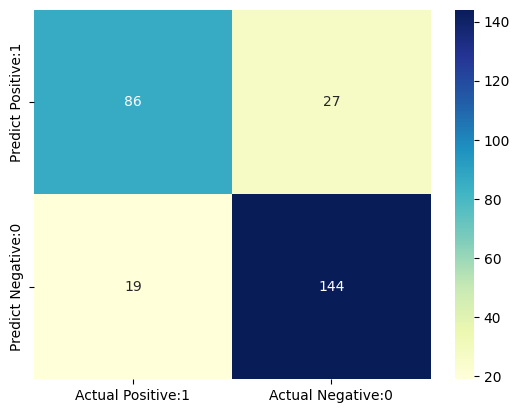

In [48]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [49]:


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))



              precision    recall  f1-score   support

           0       0.82      0.76      0.79       113
           1       0.84      0.88      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276



In [50]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8333


In [51]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1667


In [52]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy').mean()

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:0.8707364341085271


In [53]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [54]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8707


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [55]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8333


In [56]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [57]:
y_pred_test = gnb.predict(X_test)

y_pred_test

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [58]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8478


In [59]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [60]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8723


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8369565217391305


In [64]:
y_pred = knn.predict(X_train)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [65]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9096573208722741


In [66]:
#Find Best K
from sklearn import metrics
K = 30
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i) # n_neighbors = K
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))


In [67]:
print(error)
print(accuracy)

[0.1630434782608695, 0.19202898550724634, 0.1630434782608695, 0.17391304347826086, 0.16666666666666663, 0.16666666666666663, 0.1594202898550725, 0.16666666666666663, 0.1630434782608695, 0.1594202898550725, 0.1630434782608695, 0.1594202898550725, 0.1594202898550725, 0.17391304347826086, 0.1557971014492754, 0.1594202898550725, 0.1557971014492754, 0.1630434782608695, 0.1557971014492754, 0.16666666666666663, 0.1630434782608695, 0.1630434782608695, 0.1594202898550725, 0.1594202898550725, 0.1594202898550725, 0.16666666666666663, 0.1630434782608695, 0.1594202898550725, 0.15217391304347827, 0.1594202898550725]
[0.8369565217391305, 0.8079710144927537, 0.8369565217391305, 0.8260869565217391, 0.8333333333333334, 0.8333333333333334, 0.8405797101449275, 0.8333333333333334, 0.8369565217391305, 0.8405797101449275, 0.8369565217391305, 0.8405797101449275, 0.8405797101449275, 0.8260869565217391, 0.8442028985507246, 0.8405797101449275, 0.8442028985507246, 0.8369565217391305, 0.8442028985507246, 0.8333333

ValueError: x and y must have same first dimension, but have shapes (40,) and (30,)

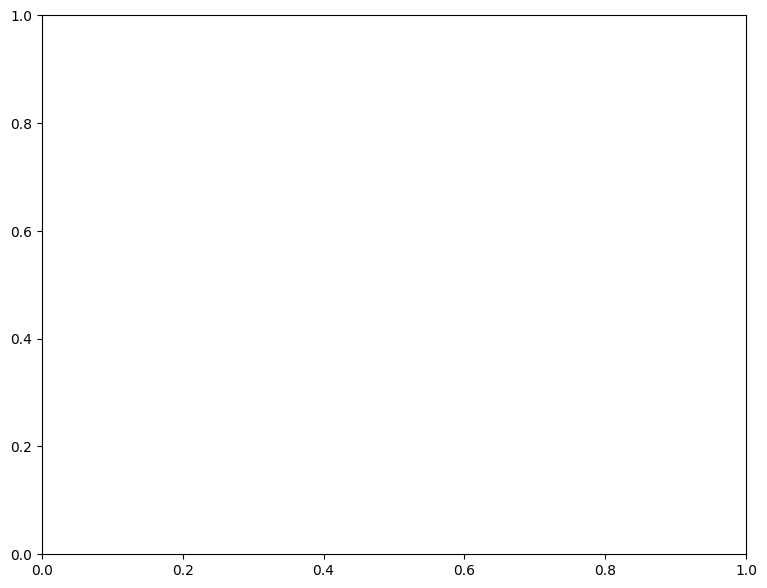

In [68]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,41),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,41),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

In [ ]:
#Find Best K
training_acc = []
test_acc = []

# try KNN for different K nearest neighbor from 1 to 30
neighbors_setting = range(1,35)
for n_neighbors in neighbors_setting:
    knn= KNeighborsClassifier(n_neighbors= n_neighbors, )
    knn.fit(X_train,y_train)
    training_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

plt.plot(neighbors_setting,training_acc,label='Accuracy of the training set')
plt.plot(neighbors_setting,test_acc,label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()
plt.show()

In [ ]:
k_values = [i for i in range (1,31)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
best_k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8405797101449275
Precision: 0.8562874251497006
Recall: 0.8773006134969326


In [70]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier  # for classification
from sklearn.tree import DecisionTreeRegressor # for regression


In [71]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [72]:
y_pred_gini = clf_gini.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8261


In [74]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9268
Test set score: 0.8261


In [91]:
import graphviz
import sklearn
dot_data=sklearn.tree.export_graphviz(clf_gini, 
                     feature_names=X_train.columns,  
                     class_names=y_train,  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = graphviz.Source(dot_data)

graph

TypeError: can only concatenate str (not "numpy.int64") to str

In [92]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [93]:
y_pred_en = clf_en.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8116


In [95]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [96]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8692


In [97]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8692
Test set score: 0.8116


In [98]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

TypeError: can only concatenate str (not "numpy.int64") to str

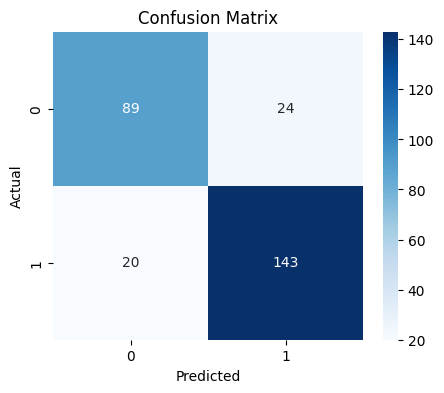

In [99]:
# Draw the cm using heatmap with class names

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8165    0.7876    0.8018       113
           1     0.8563    0.8773    0.8667       163

    accuracy                         0.8406       276
   macro avg     0.8364    0.8325    0.8342       276
weighted avg     0.8400    0.8406    0.8401       276

